# Wind Energy in Germany

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set default figure style
sns.set_style("darkgrid")

In [53]:
# Read data
file_path = Path("../data/germany_wind_data.csv")
raw_data = pd.read_csv(file_path, parse_dates=["utc_timestamp"], index_col="utc_timestamp")
raw_data.head()

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


## Dataset overview

In [29]:
# Check standard statistics
print(raw_data.describe().transpose())
print(100 * "-")
# Check composition
print(raw_data.info())

                         count           mean            std        min  \
wind_generation_actual  1094.0  305819.767824  205728.857915  16482.000   
wind_capacity           1094.0   45066.022789    4315.838061  37149.130   
temperature             1094.0      10.050167       7.739158     -9.363   

                                 25%          50%         75%         max  
wind_generation_actual  148552.75000  254332.5000  412570.500  998899.000  
wind_capacity            41447.93750   46073.0000   49203.000   50452.000  
temperature                  3.57725      10.0465      16.566      28.241  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wind_generation_actual  1094 

In [58]:
# Create ploting function
def plot_timeseries(dataframe:pd.DataFrame) -> None:
    """
    Takes timeseries dataframe with columns "temperature", "wind_generation_actual" and "wind_capacity".
    Plots subplot with one row for each column and shared time axis.
    """
    fig, axes = plt.subplots(3, sharex=True, figsize=(10, 8))
    dataframe["temperature"].plot(ax=axes[0])
    dataframe["wind_generation_actual"].plot(ax=axes[1])
    dataframe["wind_capacity"].plot(ax=axes[2])
    # Set titles
    axes[0].set_title("Temperature")
    axes[1].set_title("Wind generation")
    axes[2].set_title("Wind capacity")
    # Set y-labels
    axes[0].set_ylabel("Temperature [°C]")
    axes[1].set_ylabel("Daily wind production [MW]")
    axes[2].set_ylabel("Electrical capacity [MW]")
    # Set x-labels
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[2].set_xlabel("")

    # Display the plot
    plt.tight_layout()
    plt.show()

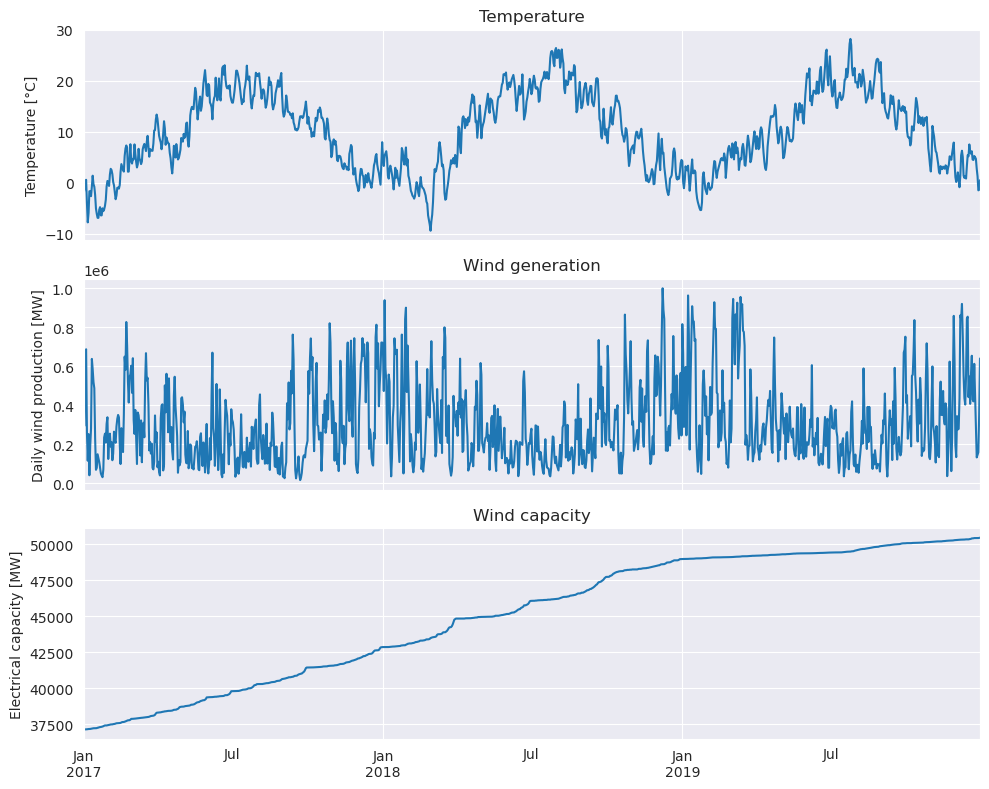

In [59]:
# Plot features over whole time
plot_timeseries(raw_data)

- Temperature has the expected seasonality with peaks in summer
- Wind generation is very fluctuative, but could show a small seasonality towards less production in summer
- Wind capacity simply increases linearly until 2019 and then starts to decrease

In [82]:
# Zoom in into yearly plots
data_2017 = raw_data.loc["2017"]
data_2018 = raw_data.loc["2018"]
data_2019 = raw_data.loc["2019"]

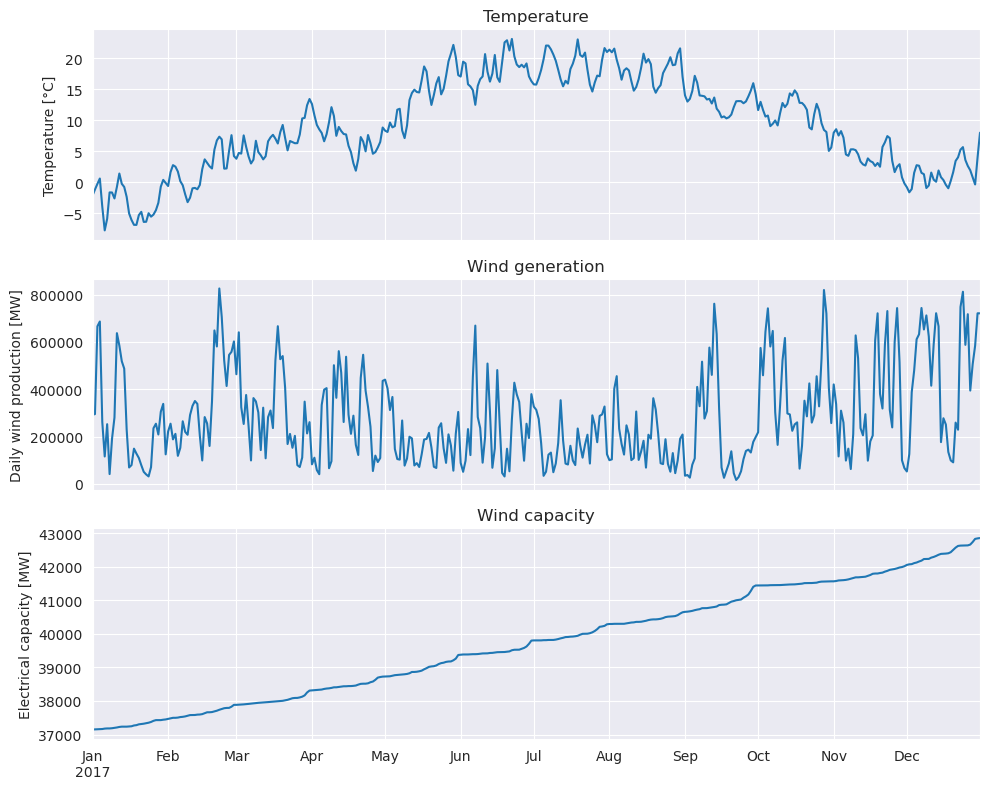

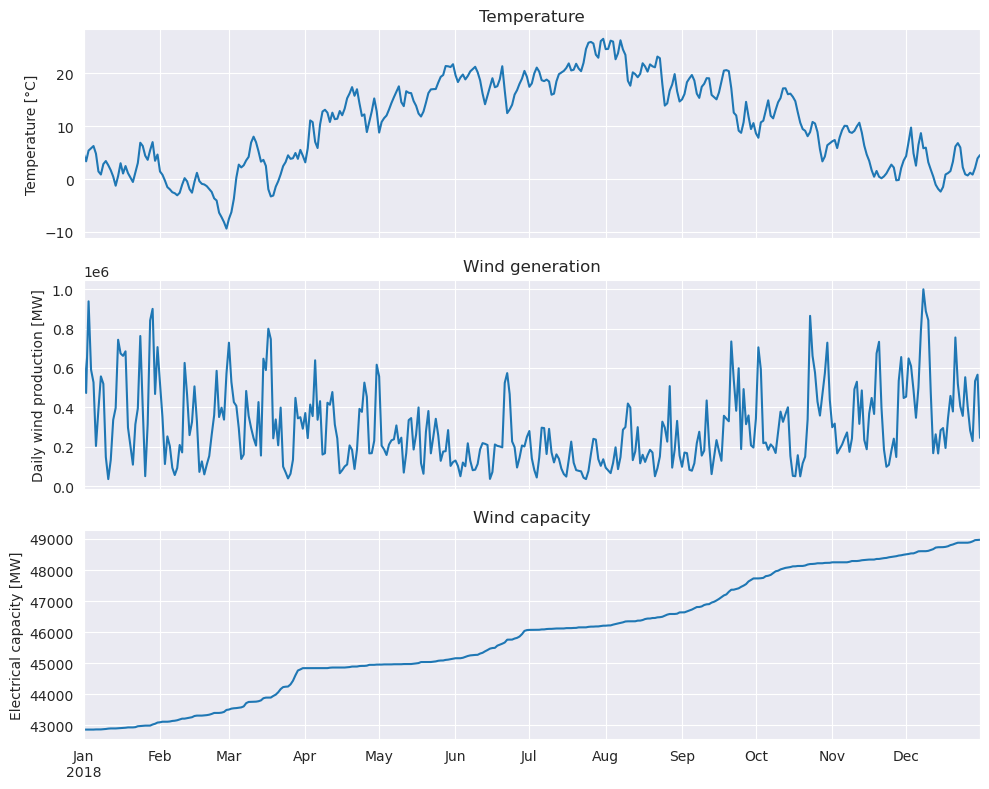

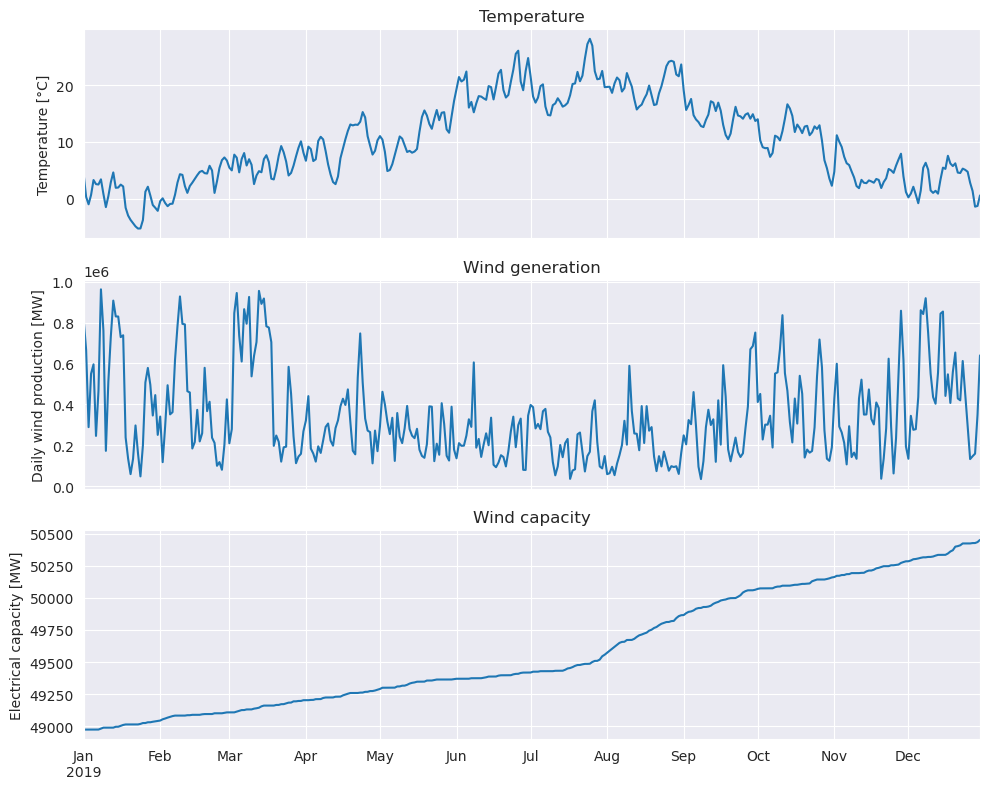

In [80]:
# Plot subsets
for subset in [data_2017, data_2018, data_2019]:
    plot_timeseries(subset)

- The 3 years do not look different temperature-wise
- Wind capacity is somewhat different 2019
- Wind generation needs further investigation

In [84]:
# Check how plausible wind capacity actually is
raw_data.head(20)

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
2017-01-06 00:00:00+00:00,115720.0,37176.208,-7.724
2017-01-07 00:00:00+00:00,252308.0,37181.000,-5.861
2017-01-08 00:00:00+00:00,41260.0,37181.250,-1.616
2017-01-09 00:00:00+00:00,190982.0,37187.458,-1.629


Text(0.5, 0, '')

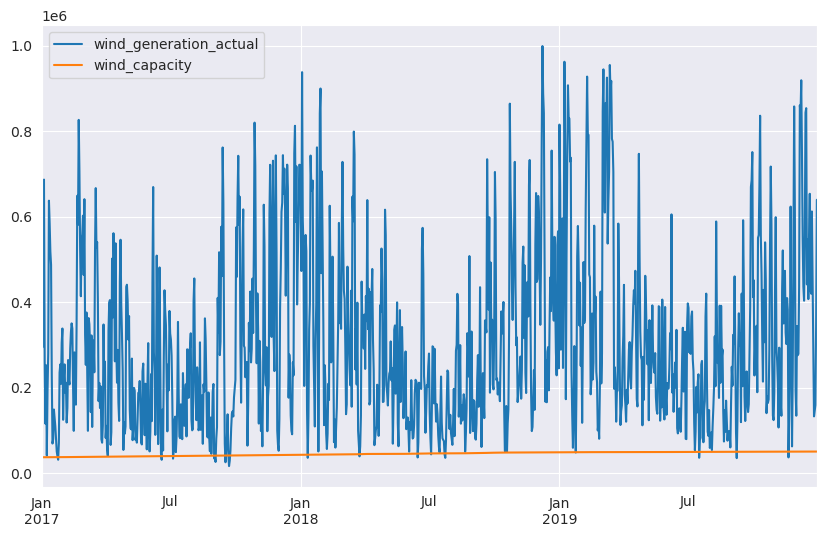

In [97]:
# Check on which scales wind capacity and production are
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Plot the first two columns (wind_generation_actual and wind_capacity)
raw_data.iloc[:, 0:2].plot(ax=ax)

# Remove the x-label
ax.set_xlabel("")

Wind capacity should be the maximum electricity production possible, therefore it is odd that some values are lower than the actual production